In [1]:
import time
import math
import random as rand
import numpy as np
from typing import Callable , Tuple, List
import matplotlib.pyplot as plt
from numba import njit
from numba.typed import List

In [2]:
@njit
def footman(arr: np.ndarray, sorted_arr: np.ndarray) -> int:
    return np.sum(np.abs(arr - sorted_arr))

In [3]:
# # l = np.array([i for i in range(10,0,-1)])
# l = np.array([9,10,8,7,6,5,4,3,2,1])
# sorted_l = np.array([i for i in range(1,11,1)])
# footman(l,sorted_l)
@njit
def bubble_sort_states_with_scores(size):
    arr = np.arange(size, 0, -1)         # Start: [10,9,...,1]
    sorted_arr = np.arange(1, size + 1)  # Sorted: [1,2,...,10]
    states = [arr.copy()]
    scores = [footman(arr, sorted_arr)]

    for i in range(size - 1):
        # Bubble pass: swap adjacent elements if out of order up to index (size - i - 1)
        for j in range(size - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
        states.append(arr.copy())
        scores.append(footman(arr, sorted_arr))

    return states, scores

states, scores = bubble_sort_states_with_scores(10)
for s, sc in zip(states, scores):
    print(f"State: {s}, Score: {sc}")

State: [10  9  8  7  6  5  4  3  2  1], Score: 50
State: [ 9  8  7  6  5  4  3  2  1 10], Score: 40
State: [ 8  7  6  5  4  3  2  1  9 10], Score: 32
State: [ 7  6  5  4  3  2  1  8  9 10], Score: 24
State: [ 6  5  4  3  2  1  7  8  9 10], Score: 18
State: [ 5  4  3  2  1  6  7  8  9 10], Score: 12
State: [ 4  3  2  1  5  6  7  8  9 10], Score: 8
State: [ 3  2  1  4  5  6  7  8  9 10], Score: 4
State: [ 2  1  3  4  5  6  7  8  9 10], Score: 2
State: [ 1  2  3  4  5  6  7  8  9 10], Score: 0


In [4]:
s = bubble_sort_states_with_scores(10)
print(s)

([array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1], dtype=int64), array([ 9,  8,  7,  6,  5,  4,  3,  2,  1, 10], dtype=int64), array([ 8,  7,  6,  5,  4,  3,  2,  1,  9, 10], dtype=int64), array([ 7,  6,  5,  4,  3,  2,  1,  8,  9, 10], dtype=int64), array([ 6,  5,  4,  3,  2,  1,  7,  8,  9, 10], dtype=int64), array([ 5,  4,  3,  2,  1,  6,  7,  8,  9, 10], dtype=int64), array([ 4,  3,  2,  1,  5,  6,  7,  8,  9, 10], dtype=int64), array([ 3,  2,  1,  4,  5,  6,  7,  8,  9, 10], dtype=int64), array([ 2,  1,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64), array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)], [50, 40, 32, 24, 18, 12, 8, 4, 2, 0])


In [5]:
@njit
def bubble_1(arr: np.ndarray) -> tuple:
    n = len(arr)
    sorted_order = np.arange(n)
    scores = List()          
    scores.append(footman(arr, np.arange(n)))

    for _ in range(n - 1):
        for j in range(n - 1):
            scores.append(footman(arr, sorted_order))
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

    return scores


In [6]:
def sim(iter: int, arr_size: int, seed:int = 10, sort_func: Callable = None) -> np.ndarray:
    rand.seed(seed)
    scores_of_scores = []

    for _ in range(iter):
        l = np.arange(arr_size)
        rand.shuffle(l)
        scores = sort_func(l.copy())
        scores_of_scores.append(scores)

    max_len = max(len(s) for s in scores_of_scores)
    padded_scores = np.array([
        np.pad(s, (0, max_len - len(s)), 'edge') for s in scores_of_scores
    ])

    return padded_scores

In [ ]:
def plot_algorithms(
    functions: List[Callable],
    names: List[str],
    iter: int,
    arr_size: int,
    seed: int = 10
    ):
    assert len(functions) == len(names), "Each function must have a corresponding name"

    colors = ['blue', 'green', 'red', 'purple', 'orange']

    for i, func in enumerate(functions):
        scores = sim(iter, arr_size, seed=seed, sort_func=func)
        scores_of_scores = np.array(scores)
        sorted_score = np.sort(scores_of_scores, axis = 0)

        upper = sorted_score[math.floor(iter * 0.95)]
        lower = sorted_score[math.floor(iter * 0.05)]
        mean = sorted_score[math.floor(iter * 0.50)]

        plt.fill_between(
            np.arange(sorted_score[0].size),
            lower,
            upper,
            color = colors[i%len(colors)],
            alpha = 0.2
        )

        plt.plot(
            np.arange(sorted_score[0].size),
            mean,
            color = colors[i%len(colors)]
        )

        _,actual_score = bubble_sort_states_with_scores(arr_size)

        plt.plot(
        np.arange(sorted_score[0].size),
        actual_score,
        color='black',
        linestyle='--',
        linewidth=2,
        label='Actual bubble sort score'
    )

    plt.xlabel('Sorting Step')
    plt.ylabel('Score')
    plt.title('Sorting Algorithms Comparison (±3 std bands)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'bubble_plot/bubble_test.png')
    plt.show()


In [8]:
# arr = np.random.permutation(10)
# start = time.time()
# sorted_arr, scores, state = bubble_1(arr.copy())
# end = time.time()

# print(f"Time taken: {end - start:.3f} seconds")
# print(f"Scores collected: {len(scores)}")

ValueError: x and y must have same first dimension, but have shapes (9802,) and (100,)

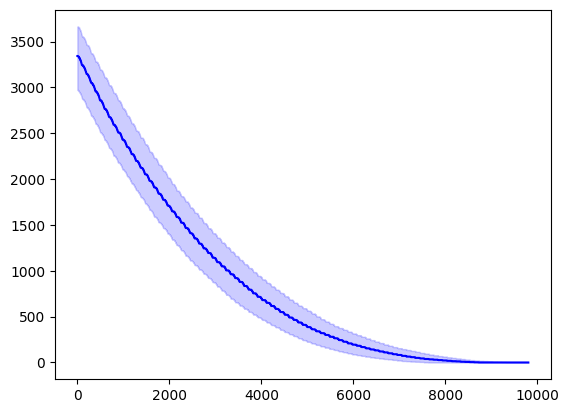

In [9]:
# scores, states = sim(500, 100, seed=10, sort_func=bubble_1)
plot_algorithms([bubble_1], 
                ["B1"],
                500,100)